In [39]:
import os
import pandas as pd
import numpy as np

In [40]:
file_path = "AQI_dataset.csv"
data = pd.read_csv(file_path, low_memory = False)
sorted_data = data.sort_values(by = ['sitename', 'datacreationdate'])

In [41]:
data.head()

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,winddirec,datacreationdate,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,沙鹿,臺中市,105.0,細懸浮微粒,對敏感族群不健康,1.8,0.31,37,35.0,51.0,...,7.0,2018-01-01 00:00,NaN,0.5,37.0,66.0,2.0,NaN,NaN,NaN
1,忠明,臺中市,115.0,細懸浮微粒,對敏感族群不健康,2.5,0.44,28,26.0,48.0,...,38.0,2018-01-01 00:00,NaN,0.7,41.0,61.0,2.0,NaN,NaN,NaN
2,西屯,臺中市,122.0,細懸浮微粒,對敏感族群不健康,2.0,0.35,40,38.0,56.0,...,9.1,2018-01-01 00:00,NaN,0.6,44.0,72.0,2.0,NaN,NaN,NaN
3,彰化,彰化縣,138.0,細懸浮微粒,對敏感族群不健康,2.8,0.44,31,27.0,61.0,...,6.2,2018-01-01 00:00,NaN,0.7,50.0,72.0,3.0,NaN,NaN,NaN
4,線西,彰化縣,133.0,細懸浮微粒,對敏感族群不健康,2.9,0.35,34,33.0,63.0,...,75.0,2018-01-01 00:00,NaN,0.5,48.0,80.0,3.0,NaN,NaN,NaN


In [42]:
# 1. 要轉換的欄位清單
columns_to_convert = [
    'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no',
    'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg'
]

# 2. 將每個欄位轉換為數值型，並將無法轉換的設為 NaN
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [43]:
# 查看 'sitename' 的分佈情況
sitename_distribution = sorted_data['sitename'].value_counts().reset_index()

# 重命名欄位
sitename_distribution.columns = ['Sitename', 'Count']

# 顯示分佈結果
print(sitename_distribution)


    Sitename  Count
0         三義  64057
1         基隆  64057
2         士林  64056
3         大園  64056
4         大同  64056
..       ...    ...
119   彰化(田尾)     81
120     忠明國小     41
121   大園(竹圍)     21
122       樹林      2
123   高雄（林園）      1

[124 rows x 2 columns]


In [44]:
# 設定 matplotlib 使用的繁體中文字體（以 Microsoft JhengHei 為例）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 繁體字型
plt.rcParams['axes.unicode_minus'] = False  # 避免顯示負號錯誤

C:\Users\丁驥\AppData\Local\Temp\ipykernel_14828\1625235082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sitename_distribution, x='Sitename', y='Count', palette='viridis')


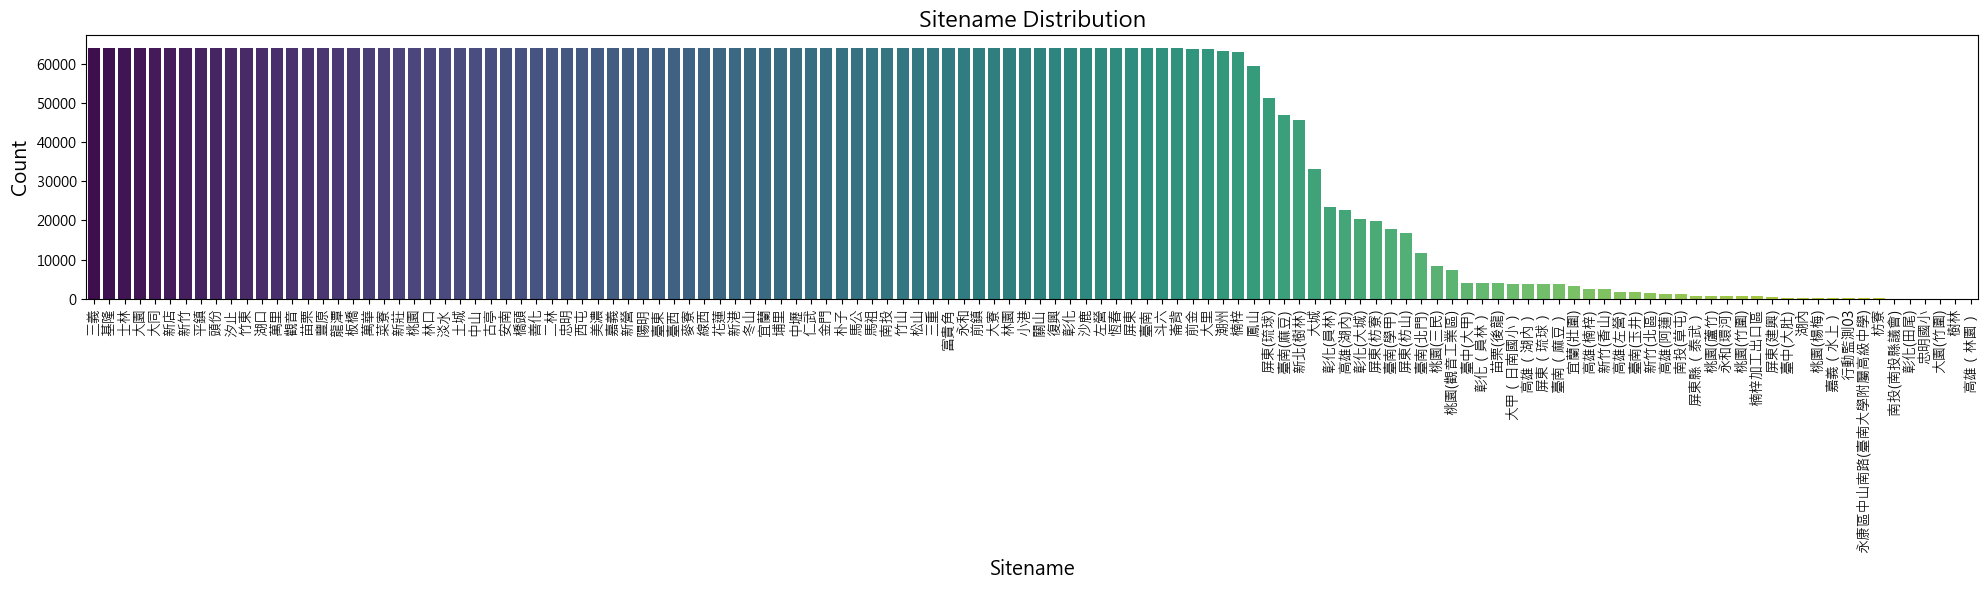

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 sitename_distribution 是一個 DataFrame，已經包含 'sitename' 和 'count' 欄位
# 繪製 sitename 的分佈條形圖
plt.figure(figsize=(20, 6))
sns.barplot(data=sitename_distribution, x='Sitename', y='Count', palette='viridis')

# 添加標題和標籤
plt.title('Sitename Distribution', fontsize=16)
plt.xlabel('Sitename', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)  # 旋轉 x 軸標籤以防止重疊
plt.tight_layout()

# 顯示圖表
plt.show()


C:\Users\丁驥\AppData\Local\Temp\ipykernel_14828\4241105774.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_sitename_distribution, x='Sitename', y='Count', palette='viridis')


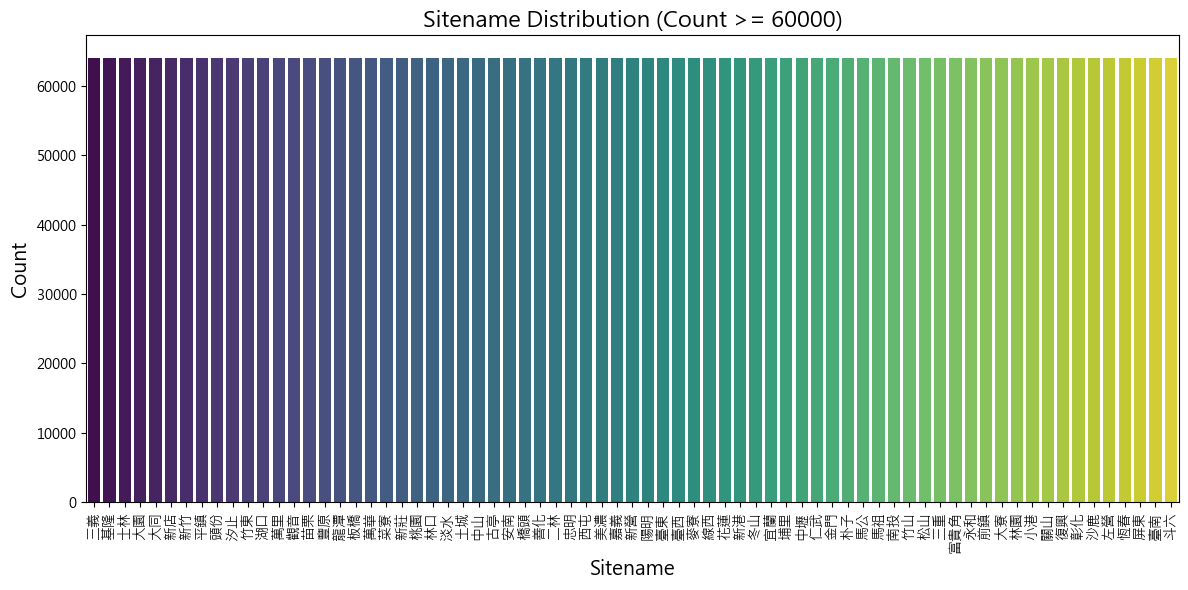

In [46]:
# 過濾掉 Count 小於 60000 的 sitename
filtered_sitename_distribution = sitename_distribution[sitename_distribution['Count'] >= 64000]

# 繪製過濾後的條形圖
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_sitename_distribution, x='Sitename', y='Count', palette='viridis')

# 添加標題和標籤
plt.title('Sitename Distribution (Count >= 60000)', fontsize=16)
plt.xlabel('Sitename', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)  # 旋轉 x 軸標籤以防止重疊
plt.tight_layout()

# 顯示圖表
plt.show()


In [47]:
data.isna().mean()

sitename            0.000000
county              0.000000
aqi                 0.006164
pollutant           0.569132
status              0.002316
so2                 0.023684
co                  0.025243
o3                  0.033630
o3_8hr              0.023110
pm10                0.025136
pm2.5               0.031485
no2                 0.027913
nox                 0.027958
no                  0.028020
windspeed           0.032775
winddirec           0.032828
datacreationdate    0.000000
unit                1.000000
co_8hr              0.015340
pm2.5_avg           0.012552
pm10_avg            0.015906
so2_avg             0.012720
longitude           0.038467
latitude            0.038467
siteid              0.198117
dtype: float64

In [48]:
data.dropna()

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,winddirec,datacreationdate,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid


In [49]:
data.shape

(5298276, 25)

In [50]:
data.dtypes

sitename             object
county               object
aqi                 float64
pollutant            object
status               object
so2                 float64
co                  float64
o3                  float64
o3_8hr              float64
pm10                float64
pm2.5               float64
no2                 float64
nox                 float64
no                  float64
windspeed            object
winddirec            object
datacreationdate     object
unit                float64
co_8hr              float64
pm2.5_avg           float64
pm10_avg            float64
so2_avg             float64
longitude           float64
latitude            float64
siteid              float64
dtype: object

In [51]:
# 單位轉換
# o3_ 8hr & o3 在資料的單位是 ppb, 但要轉成 ppm
columns_to_convert = ["o3", "o3_8hr"]  
for col in columns_to_convert:
    data.loc[:, col] = (data[col] / 1000).round(4)

In [52]:
# 將 outlier 資料刪除
data = data[(data["pm10"] <= 604) & 
                                                (data["pm2.5"] <= 500.4)]

In [53]:
import pandas as pd
from tqdm import tqdm

# 設定各指標的最低閾值
thresholds = {
    'o3_8hr': 0.071,
    'o3': 0.125,
    'pm2.5': 35.5,
    'pm10': 101,
    'co': 9.5,
    'so2': 76,
    'no2': 101
}

# 假設 final_preprocess_data_filtered 是已經處理好的資料
filtered_data = data.copy()

# 用來儲存每行超過閾值的指標
exceeded_values = []

# 逐行遍歷 DataFrame 並顯示進度條
for index, row in tqdm(filtered_data.iterrows(), total=filtered_data.shape[0], desc="Processing Rows"):
    exceeded = []  # 記錄該行超過閾值的指標
    for column, threshold in thresholds.items():
        if column in row and pd.notna(row[column]) and row[column] > threshold:
            exceeded.append(column)  # 若該指標超過閾值且有數值，加入到 exceeded 列表中
    exceeded_values.append(exceeded)  # 將結果加入總列表

# 將 exceeded_values 新增到原始 DataFrame 的 'Exceeded_Indicators' 欄位
filtered_data['Exceeded_Indicators'] = exceeded_values

# 將空的 Exceeded_Indicators 替換為 NaN
filtered_data['Exceeded_Indicators'] = filtered_data['Exceeded_Indicators'].apply(lambda x: None if len(x) == 0 else x)

# 刪除 Exceeded_Indicators 是 NaN 的行
filtered_data = filtered_data[filtered_data['Exceeded_Indicators'].notna()]

# 計算每一種汙染物超標的總數量
pollutants = list(thresholds.keys())  # 所有汙染物指標
exceeded_count = {pollutant: 0 for pollutant in pollutants}  # 初始化計數字典

# 逐行遍歷 Exceeded_Indicators 欄位，統計每種汙染物超標的次數
for exceeded in filtered_data['Exceeded_Indicators']:
    if exceeded is not None:
        for pollutant in exceeded:
            exceeded_count[pollutant] += 1

# 輸出每種汙染物超標的總數量
print("汙染物超標的總數量:")
for pollutant, count in exceeded_count.items():
    print(f"{pollutant}: {count}")

# 儲存處理後的資料，包括 'Exceeded_Indicators' 欄位
output_file_path = 'processed_data_with_exceeded_indicators.csv'
filtered_data.to_csv(output_file_path, index=False)

# 檢視結果
print(filtered_data.head())
print(filtered_data.shape)


Processing Rows: 100%|██████████| 5056160/5056160 [06:40<00:00, 12639.83it/s]


汙染物超標的總數量:
o3_8hr: 54616
o3: 136
pm2.5: 368930
pm10: 67682
co: 6
so2: 58
no2: 5
   sitename county    aqi pollutant    status  so2    co     o3  o3_8hr  \
3        彰化    彰化縣  138.0     細懸浮微粒  對敏感族群不健康  2.8  0.44  0.031   0.027   
19      富貴角    新北市  123.0     細懸浮微粒  對敏感族群不健康  0.6  0.24  0.051   0.049   
21       金門    金門縣  153.0     細懸浮微粒  對所有族群不健康  3.6  0.51  0.052   0.047   
22       馬祖    連江縣  155.0     細懸浮微粒  對所有族群不健康  3.1  0.48  0.059   0.063   
23       埔里    南投縣  148.0     細懸浮微粒  對敏感族群不健康  2.5  0.73  0.010   0.028   

     pm10  ...  datacreationdate  unit  co_8hr  pm2.5_avg pm10_avg so2_avg  \
3    61.0  ...  2018-01-01 00:00   NaN     0.7       50.0     72.0     3.0   
19   80.0  ...  2018-01-01 00:00   NaN     0.3       44.0    106.0     1.0   
21  140.0  ...  2018-01-01 00:00   NaN     0.5       58.0    116.0     4.0   
22  124.0  ...  2018-01-01 00:00   NaN     0.5       63.0    127.0     3.0   
23   72.0  ...  2018-01-01 00:00   NaN     0.7       54.0     66.0     2.0   



In [55]:
import pandas as pd
from tqdm import tqdm


# 依照測站名稱和時間進行排序
filtered_data = filtered_data.sort_values(by=['sitename', 'datacreationdate'])

# 檢查資料結構
print(filtered_data.head())

# 轉換 Exceeded_Indicators 為序列形式，每行一個測站的超標汙染物
sequences = []

# 依測站分組
for sitename, group in filtered_data.groupby('sitename'):
    sequence = []
    for _, row in group.iterrows():
        if row['Exceeded_Indicators'] is not None:
            sequence.append(row['Exceeded_Indicators'])  # 將每個時間點的超標汙染物加入序列
    sequences.append(sequence)

# 顯示處理後的序列
print(sequences[:5])  # 顯示前 5 條序列


     sitename county    aqi pollutant    status  so2    co     o3  o3_8hr  \
1353       三義    苗栗縣   71.0     細懸浮微粒        普通 -0.5  0.40  0.051   0.051   
4602       三義    苗栗縣   75.0     細懸浮微粒        普通  NaN  0.42  0.050   0.025   
4684       三義    苗栗縣   98.0     細懸浮微粒        普通  NaN  0.71  0.051   0.028   
4729       三義    苗栗縣  126.0     細懸浮微粒  對敏感族群不健康  3.7  0.55  0.059   0.032   
4800       三義    苗栗縣  147.0     細懸浮微粒  對敏感族群不健康  2.8  0.50  0.069   0.040   

       pm10  ...  datacreationdate  unit  co_8hr  pm2.5_avg pm10_avg so2_avg  \
1353   53.0  ...  2018-01-01 17:00   NaN     0.3       24.0     42.0     1.0   
4602   68.0  ...  2018-01-03 11:00   NaN     0.4       25.0     45.0     NaN   
4684  127.0  ...  2018-01-03 12:00   NaN     0.4       35.0     59.0     NaN   
4729  137.0  ...  2018-01-03 13:00   NaN     0.4       45.0     75.0     NaN   
4800  109.0  ...  2018-01-03 14:00   NaN     0.5       53.0     86.0     NaN   

     longitude  latitude  siteid  Exceeded_Indicators  


In [56]:
import pyfpgrowth

# 假設 filtered_data 已經包含了 'Exceeded_Indicators' 欄位
# 每行中的 Exceeded_Indicators 是一個列表，將其轉換為 GSP 需要的序列格式

# 將 Exceeded_Indicators 轉換為 GSP 可用的格式（每條序列是一個列表）
sequences = filtered_data['Exceeded_Indicators'].dropna().tolist()

# 確保每條序列中的元素是可哈希的（例如將每個指標轉為字符串）
sequences = [list(map(str, seq)) for seq in sequences]  # 將每個元素轉為字串

# 開始進行頻繁模式挖掘
patterns = pyfpgrowth.find_frequent_patterns(sequences, 3)  # 設定最小支持度為 3 次出現

# 定義最小支持度閾值，例如 0.1
min_support_threshold = 0.1 * len(sequences)  # 計算最小支持度

# 過濾掉支持度低於最小支持度閾值的模式
filtered_patterns = {pattern: support for pattern, support in patterns.items() if support >= min_support_threshold}

# 輸出頻繁模式
print("頻繁模式:")
for pattern, support in filtered_patterns.items():
    print(f"模式: {pattern}, 支持度: {support}")


頻繁模式:
模式: ('pm10',), 支持度: 67682
模式: ('pm10', 'pm2.5'), 支持度: 48173
模式: ('pm2.5',), 支持度: 368930


In [57]:
patterns

{('no2',): 5,
 ('co',): 6,
 ('pm10', 'so2'): 3,
 ('pm2.5', 'so2'): 15,
 ('o3', 'pm10'): 11,
 ('o3', 'pm10', 'pm2.5'): 11,
 ('o3', 'o3_8hr', 'pm10'): 4,
 ('o3', 'o3_8hr', 'pm10', 'pm2.5'): 4,
 ('o3', 'o3_8hr'): 53,
 ('o3', 'o3_8hr', 'pm2.5'): 38,
 ('o3', 'pm2.5'): 98,
 ('o3_8hr', 'pm10'): 3100,
 ('o3_8hr', 'pm10', 'pm2.5'): 2157,
 ('o3_8hr', 'pm2.5'): 11088,
 ('pm10',): 67682,
 ('pm10', 'pm2.5'): 48173,
 ('pm2.5',): 368930}